<a href="https://colab.research.google.com/github/shubhanshu1995/Deep-Learning-with-Keras/blob/master/Getting_Started_with_Keras_Simple_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating Artificial Neural Network with Keras - The Python Deep Learning library**


In [0]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [0]:
train_labels = []
train_samples = []

## Example data:


*   An experimental drug was tested on individuals from ages 13 to 100.   
*   The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.

*   95% of patients 65 or older experienced side effects.
*   95% of patients under 65 experienced no side effects.





In [0]:
for i in range(50):
  #The 5% of younger individuals who did experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)
  
  #The 5% of older individuals who didn't experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)
  
  
for i in range(1000):
  #The 95% of younger individuals who did not experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)
  
  #The 95% of older individuals who did experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [51]:
#print raw data
for i in range(11):
  print(train_samples[i])

61
66
30
92
19
73
47
94
27
80
52


In [52]:
len(train_samples)

2100

In [53]:
for i in range(11):
  print(train_labels[i])

1
0
1
0
1
0
1
0
1
0
1


In [0]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [55]:
train_samples.shape

(2100,)

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [57]:
scaled_train_samples.shape

(2100, 1)

In [58]:
#print scaled data
for i in range(11):
  print(scaled_train_samples[i])

[0.55172414]
[0.6091954]
[0.1954023]
[0.90804598]
[0.06896552]
[0.68965517]
[0.3908046]
[0.93103448]
[0.16091954]
[0.77011494]
[0.44827586]


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

#Keras sequential model is the linear stack of layers
###`model = Sequential([layer1,layer2,layer3]) `
##or
###`model.add(layer1)`

###`model.add(layer2)`

###`model.add(layer3)`

In [0]:
model = Sequential([
    Dense(16,input_shape=(1,),activation='relu'),
    Dense(32,activation='relu'),
    Dense(2,activation='softmax')
])

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# **Validation set**

*  validation_set = [(samples,labels),(samples,labels),...............,(samples,labels)]
* Shuffle is not applicable for validation set

*   The validation_split parameter takes the last x% of the data in the training set (10% in our example), and doesn't shuffle it. With the way I had the for-loops organized originally, the validation split would completely capture all of the data in the second for loop, which was the 5% of younger individuals who did experience side effects and the 5% of older individuals who did not experience side effects. Therefore, none of the data in the second for-loop would be captured in the training set.
*   With the re-ordering of the for-loops, the training set is made up of the data that is now generated in both for-loops. With this explanation, check out the code that does this again, and let me know if things are more clear now.




*   Another approach we could have taken is, after generating all the data with both for-loops (regardless of which order the loops are in), we could shuffle all the data completely, and then pass that shuffled data to our model. With shuffled data, the training set and validation sets would be a more accurate depiction of the true underlying data since there would be no real ordering to it. As long as your data in the real world is shuffled before you pass it to your model, you shouldn't experience this problem.



In [63]:
model.fit(scaled_train_samples, train_labels, validation_split = 0.1, batch_size=10,epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 1s - loss: 0.6903 - acc: 0.4889 - val_loss: 0.6809 - val_acc: 0.5143
Epoch 2/20
 - 1s - loss: 0.6739 - acc: 0.5392 - val_loss: 0.6635 - val_acc: 0.5524
Epoch 3/20
 - 1s - loss: 0.6575 - acc: 0.5720 - val_loss: 0.6448 - val_acc: 0.5952
Epoch 4/20
 - 1s - loss: 0.6398 - acc: 0.6122 - val_loss: 0.6249 - val_acc: 0.6238
Epoch 5/20
 - 1s - loss: 0.6222 - acc: 0.6423 - val_loss: 0.6049 - val_acc: 0.6571
Epoch 6/20
 - 1s - loss: 0.6036 - acc: 0.6704 - val_loss: 0.5837 - val_acc: 0.7000
Epoch 7/20
 - 1s - loss: 0.5855 - acc: 0.6862 - val_loss: 0.5632 - val_acc: 0.7190
Epoch 8/20
 - 1s - loss: 0.5679 - acc: 0.7153 - val_loss: 0.5430 - val_acc: 0.7381
Epoch 9/20
 - 1s - loss: 0.5506 - acc: 0.7413 - val_loss: 0.5228 - val_acc: 0.7619
Epoch 10/20
 - 1s - loss: 0.5337 - acc: 0.7614 - val_loss: 0.5035 - val_acc: 0.7952
Epoch 11/20
 - 1s - loss: 0.5169 - acc: 0.7868 - val_loss: 0.4838 - val_acc: 0.8190
Epoch 12/20
 - 1s - loss: 0.4986 - acc

# **Preprocessing Test Data**

In [0]:
test_labels = []
test_samples = []

In [0]:
for i in range(10):
  #The 5% of younger individuals who did experience side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)
  
  #The 5% of older individuals who didn't experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)
  
  
for i in range(200):
  #The 95% of younger individuals who did not experience side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)
  
  #The 95% of older individuals who did experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [0]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [67]:
test_samples.shape

(420,)

In [0]:
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

In [69]:
scaled_test_samples.shape

(420, 1)

# **Predict**

In [0]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [71]:
for i in range(11):
  print(predictions[i])

[0.7882464  0.21175356]
[0.06701652 0.93298346]
[0.7877697  0.21223032]
[0.28164363 0.7183564 ]
[0.7889383  0.21106172]
[0.14930409 0.8506959 ]
[0.48512712 0.51487285]
[0.16883112 0.83116883]
[0.7877697  0.21223032]
[0.10169999 0.89830005]
[0.7877697  0.21223032]


In [0]:
rounded_predictions = model.predict_classes(scaled_test_samples,batch_size=10,verbose=0)

In [73]:
for i in range(11):
  print(rounded_predictions[i])

0
1
0
1
0
1
1
1
0
1
0


#**Create confusion matrix for predictions from Keras model**

In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [0]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
  """
    This function prints and plotes confusion matrix.
    Normalization can be applied by setting `normalize=True`.
  """
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
   
  print(cm)
  
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[178  32]
 [  9 201]]


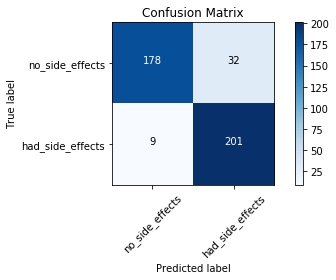

In [77]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# **Save and load a Keras model**

## The save function saves:


*   The architecture of the model, allowing to re-create the model.
*   The weights of the model.

*   The training configuration (loss, optimizer)
*   The state of the optimizer, allowing to resume training exactle where you left off.





## **1. model.save()**

In [0]:
model.save('medical_trial_model.h5')

In [0]:
from keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [80]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [81]:
new_model.get_weights()

[array([[-0.5401617 ,  0.37126493,  0.72509444, -0.3109035 , -0.4677226 ,
         -0.05000418,  0.37733468,  0.6399426 , -0.348753  , -0.57434666,
         -0.37982494,  0.6084672 ,  0.42577147, -0.06402647,  0.0052969 ,
         -0.1833323 ]], dtype=float32),
 array([ 0.        , -0.09558814, -0.1082458 ,  0.        ,  0.        ,
         0.        , -0.1273098 , -0.1427159 ,  0.        ,  0.        ,
         0.        , -0.10051664, -0.1159861 ,  0.        , -0.00558828,
         0.        ], dtype=float32),
 array([[-0.06622845, -0.14780857, -0.10229772,  0.12341911, -0.23635396,
          0.2777137 , -0.12391174,  0.31346068, -0.30685982,  0.20774183,
         -0.0125365 ,  0.03532994,  0.13304418,  0.05261478, -0.06504953,
          0.20747772, -0.02272743,  0.1755105 ,  0.3456985 ,  0.33658668,
          0.26801094, -0.14203344, -0.0274618 ,  0.34784797,  0.3472639 ,
         -0.18473487,  0.24058017,  0.29929158,  0.00411361,  0.3190616 ,
          0.32881674, -0.07358646],
 

In [82]:
new_model.optimizer

##**2. model.to_json()**





In [0]:
#save as JSON
json_string = model.to_json()

#save as YAML
#yaml_string = model.to_yaml()

In [85]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_8", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "act

In [0]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [87]:
model_architecture.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## **3. model.save_weights()**
If you only need to save the weights of a model, you can use the following function save the weights only

In [0]:
model.save_weights('my_model_weights.h5')

In [0]:
model2 = Sequential([
    Dense(16,input_shape=(1,),activation='relu'),
    Dense(32,activation='relu'),
    Dense(2,activation='softmax')
])

In [0]:
model2.load_weights('my_model_weights.h5')